Will Manley
<br>
COMSC 415
<br>
Project 1

## Part 1

In [17]:
import pandas as pd # conventional alias
import numpy as np # conventional alias
import matplotlib.pyplot as plt # conventional alias

from sklearn.datasets import load_boston
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target # add median housing price column

df.info() # Info about our dataframe containing the number of points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


There are 506 datapoints within the dataset. Each point has 13 features (not including MEDV).

## Part 2

In [31]:
# Print the values using the proper functions
print('Min MEDV Value:', df['MEDV'].min())
print('Max MEDV Value:', df['MEDV'].max())
print('Mean MEDV Value:', df['MEDV'].mean())
print('Standard Deviation MEDV Value:', df['MEDV'].std())

Min MEDV Value: 5.0
Max MEDV Value: 50.0
Mean MEDV Value: 22.532806324110698
Standard Deviation MEDV Value: 9.19710408737982


In [32]:
print('Min RM Value:', df['RM'].min())
print('Max RM Value:', df['RM'].max())
print('Mean RM Value:', df['RM'].mean())
print('Standard Deviation RM Value:', df['RM'].std())

Min RM Value: 3.561
Max RM Value: 8.78
Mean RM Value: 6.284634387351787
Standard Deviation RM Value: 0.7026171434153237


In [33]:
print('Min LSTAT Value:', df['LSTAT'].min())
print('Max LSTAT Value:', df['LSTAT'].max())
print('Mean LSTAT Value:', df['LSTAT'].mean())
print('Standard Deviation LSTAT Value:', df['LSTAT'].std())

Min LSTAT Value: 1.73
Max LSTAT Value: 37.97
Mean LSTAT Value: 12.653063241106723
Standard Deviation LSTAT Value: 7.141061511348571


In [34]:
print('Min PTRATIO Value:', df['PTRATIO'].min())
print('Max PTRATIO Value:', df['PTRATIO'].max())
print('Mean PTRATIO Value:', df['PTRATIO'].mean())
print('Standard Deviation PTRATIO Value:', df['PTRATIO'].std())

Min PTRATIO Value: 12.6
Max PTRATIO Value: 22.0
Mean PTRATIO Value: 18.455533596837967
Standard Deviation PTRATIO Value: 2.164945523714446


## Part 3

RM: If the average number of rooms among homes in the neighboord increased, then I believe the median value of owner-occupied homes would increase. I believe this because the value of many houses would go up, and as a result the median value should go up (assuming enough houses increase in price).
<br> <br>
LSTAT: If the percentage of all Boston homeowners who have a greater net worth than the homeowners in the neighborhood went up, then I feel as if the median value of the homes would probably go down. If the LSTAT percentage is high, then I feel as if that given neighborhood may be deteriorating over time. As a result, many of the house values have probably gone down resuting in a lower median value of owner-occupied homes.
<br> <br>
PTRATIO: If the ratio of students to teachers in primary and secondary schools in the neighborhood increased, then I believe that the median value of owner-occupied homes would potentially decrease. This one seems harder to predict; however, it seems more logical to me that the bigger the student to teacher ratio is, the worse a students education will be. As a result, I believe that the median house price would decrease slightly.
<br><br>
Of the three, I would expect LSTAT to have the strongest correlation to MEDV. It seems to make sense that the lower median value of houses go, the higher the percentage of people with more net worth than the homeowners within the neighborhood would increase. The average amount of rooms should also have a decent correlation; however, I do not think it will be as strong.

## Part 4

In [43]:
df_clean = df.filter(['RM', 'PTRATIO', 'LSTAT', 'MEDV']) #Clean the data to make the correlation easier to visualize
df_clean.corr(method='pearson')

,RM,PTRATIO,LSTAT,MEDV
RM,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,-0.355501,1.000000,0.374044,-0.507787
LSTAT,-0.613808,0.374044,1.000000,-0.737663
MEDV,0.695360,-0.507787,-0.737663,1.000000


It appears that my predictions were pretty accurate for all three features. The increase in RM made MEDV increase, the increase in LSTAT made MEDV decrease, and the increase in PTRATIO made MEDV decrease. I'm able to come to this conclusion due to the correlation between MEDV and RM being positive and the correlation between MEDV and LSTAT/PTRATIO being negative.

## Part 5

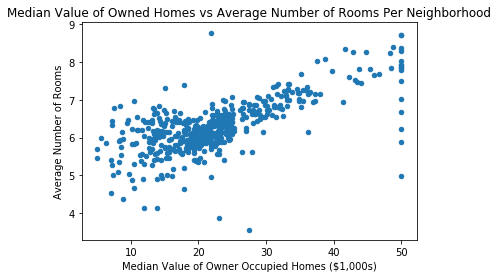

In [63]:
# Scatter plots to compare MEDV with the required features
plt.scatter(df_clean[['MEDV']], df_clean[['RM']], s = 20)
plt.xlabel('Median Value of Owner Occupied Homes ($1,000s)')
plt.ylabel('Average Number of Rooms')
plt.title('Median Value of Owned Homes vs Average Number of Rooms Per Neighborhood')
plt.show()

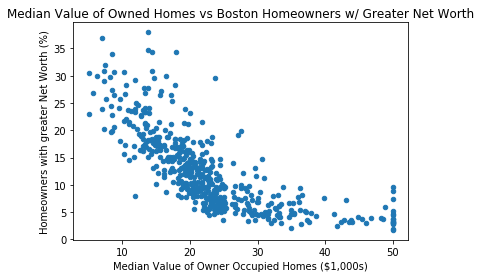

In [66]:
plt.scatter(df_clean[['MEDV']], df_clean[['LSTAT']], s = 20)
plt.xlabel('Median Value of Owner Occupied Homes ($1,000s)')
plt.ylabel('Homeowners with greater Net Worth (%)')
plt.title('Median Value of Owned Homes vs Boston Homeowners w/ Greater Net Worth')
plt.show()

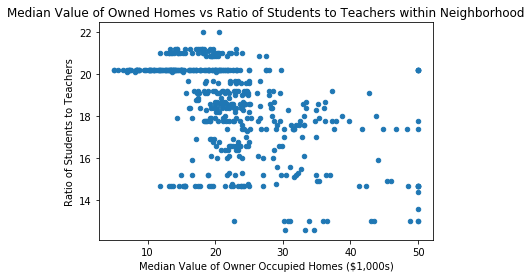

In [68]:
plt.scatter(df_clean[['MEDV']], df_clean[['PTRATIO']], s = 20)
plt.xlabel('Median Value of Owner Occupied Homes ($1,000s)')
plt.ylabel('Ratio of Students to Teachers')
plt.title('Median Value of Owned Homes vs Ratio of Students to Teachers within Neighborhood')
plt.show()

## Part 6

There are quite a few interesting things going on with the above graphs. It is interesting to see that the median values of owner occupied homes within these neighborhoods maxes out at \$50,000. This seems very low considering how expensive houses are nowadays. After going back to the assignment instructions, I saw that the data was from 1978 which explains why the median house cost is only $50,000 at most. The cost of housing has gone up a lot since then.

I am not that surprised that the smaller the ratio of students to teachers within a neighborhood, the higher the median housing price is. In most areas, the cost of an average house is typically higher if there is a good public school system. The lower that ratio is, the more a teacher can focus on every individual, resulting in better grades. 

I also found it interesting how the median value of a neighborhood's homes can shoot up due to there being an extra two rooms on average per house. It's crazy to see that having 8 rooms as opposed to two would increase the median price of the homes by \$20,000. It's even crazier to think about how much that price increase would be today.